<center><h1><strong><font color="blue">Uraian Kelas Terakhir</font></strong></h1></center>

* <strong><font color="blue">Penelaahan Data (EDA)</font></strong>
  * Memuat Data & Meyakinkan Tipe Data
  * Noise
  * Duplikasi
  * Outlier
  * Missing Value
  * Transformasi
  * Statistika Deskriptif
  * Visualisasi & Analisa
  * Simpan data untuk pemodelan

# STUDI KASUS

1. Data sensus Amerika tahun 1994
2. Variabel Target : individu dengan jumlah penghasilan  lebih dan kurang dari 50.000 USD
3. Variabel Prediktor : 	Umur,Sektor, fnlwgt, Pendidikan,	KelasPendidikan	Status,	Pekerjaan,	Relationship,	Ras	Gender,	Gain,	Loss,	JamKerjaHarian dan	AsalNegara
4. Keterangan data : http://archive.ics.uci.edu/dataset/2/adult
5. Pada analisis ini menggunakan data mirror dalam format csv dari Tau-Data : https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv

## Data Loading

In [ ]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan

file_ = 'data/adult.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-12-30 02:53:46--  https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5342628 (5.1M) [text/plain]
Saving to: ‘data/adult.csv’

adult.csv           100%[===================>]   5.09M  --.-KB/s    in 0.05s   

2023-12-30 02:53:47 (102 MB/s) - ‘data/adult.csv’ saved [5342628/5342628]

baris =  48842 , Kolom (jumlah variabel) =  15


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA

### cek kelengkapan data dan integritas data



In [ ]:
# cek informasi tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Umur             48842 non-null  int64 
 1   Sektor           48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   Pendidikan       48842 non-null  object
 4   KelasPendidikan  48842 non-null  int64 
 5   Status           48842 non-null  object
 6   Pekerjaan        48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Ras              48842 non-null  object
 9   Gender           48842 non-null  object
 10  Gain             48842 non-null  int64 
 11  Loss             48842 non-null  int64 
 12  JamKerjaHarian   48842 non-null  int64 
 13  AsalNegara       48842 non-null  object
 14  Penghasilan      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Cek Duplikasi pada Data**

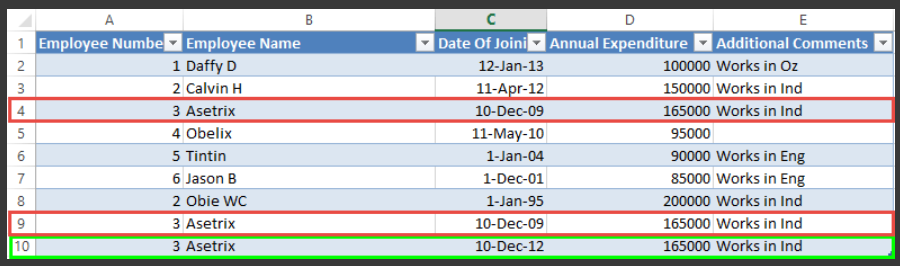

In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(48842, 15)
jumlah data yang duplikat 29


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [ ]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(48813, 15)


**Check Noise pada Variabel**

In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sektor,Pendidikan,Status,Pekerjaan,Relationship,Ras,Gender,AsalNegara,Penghasilan
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48813 non-null  int64   
 1   Sektor           48813 non-null  category
 2   fnlwgt           48813 non-null  int64   
 3   Pendidikan       48813 non-null  category
 4   KelasPendidikan  48813 non-null  int64   
 5   Status           48813 non-null  category
 6   Pekerjaan        48813 non-null  category
 7   Relationship     48813 non-null  category
 8   Ras              48813 non-null  category
 9   Gender           48813 non-null  category
 10  Gain             48813 non-null  int64   
 11  Loss             48813 non-null  int64   
 12  JamKerjaHarian   48813 non-null  int64   
 13  AsalNegara       48813 non-null  category
 14  Penghasilan      48813 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


### cek noise data kategorik

In [ ]:
# get all unique values of a variable/column
catVar = df.select_dtypes(include = ['object', 'category'])
numVar = df.select_dtypes(include = ['int', 'float'])

for col in catVar.columns:
    print(col,': ', set(catVar[col].unique()))

Sektor :  {'Self-emp-not-inc', 'Without-pay', 'Self-emp-inc', 'State-gov', 'Local-gov', 'Private', 'Never-worked', 'Federal-gov', '?'}
Pendidikan :  {'Masters', 'Bachelors', 'HS-grad', 'Some-college', '9th', 'Assoc-acdm', 'Doctorate', '1st-4th', 'Preschool', '5th-6th', '10th', 'Prof-school', '12th', '7th-8th', '11th', 'Assoc-voc'}
Status :  {'Married-AF-spouse', 'Widowed', 'Separated', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married'}
Pekerjaan :  {'Other-service', 'Protective-serv', 'Farming-fishing', 'Transport-moving', 'Machine-op-inspct', 'Priv-house-serv', 'Exec-managerial', 'Prof-specialty', 'Adm-clerical', 'Tech-support', 'Craft-repair', 'Armed-Forces', 'Sales', '?', 'Handlers-cleaners'}
Relationship :  {'Not-in-family', 'Own-child', 'Husband', 'Unmarried', 'Other-relative', 'Wife'}
Ras :  {'Amer-Indian-Eskimo', 'Other', 'White', 'Black', 'Asian-Pac-Islander'}
Gender :  {'Male', 'Female'}
AsalNegara :  {'Ecuador', 'Vietnam', 'Japan', 'Taiwan', 'Haiti', 

ADA YANG LIHAT KEANEHAN ?

In [ ]:
# mengganti value data dengan value yang sesungguhnya
import numpy as np

df['Penghasilan'] = df['Penghasilan'].replace(to_replace=">50K.", value=">50K")
df['Penghasilan'] = df['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
df['Sektor'] = df['Sektor'].replace(to_replace="?", value=np.nan)
df['Pekerjaan'] = df['Pekerjaan'].replace(to_replace="?", value=np.nan)
df['AsalNegara'] = df['AsalNegara'].replace(to_replace="?", value=np.nan)

for col in df.select_dtypes(include = ['object', 'category']).columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Self-emp-not-inc', 'Without-pay', 'Self-emp-inc', 'State-gov', 'Local-gov', 'Private', nan, 'Never-worked', 'Federal-gov'}
Pendidikan :  {'Masters', 'Bachelors', 'HS-grad', 'Some-college', '9th', 'Assoc-acdm', 'Doctorate', '1st-4th', 'Preschool', '5th-6th', '10th', 'Prof-school', '12th', '7th-8th', '11th', 'Assoc-voc'}
Status :  {'Married-AF-spouse', 'Widowed', 'Separated', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married'}
Pekerjaan :  {'Other-service', 'Protective-serv', 'Farming-fishing', 'Transport-moving', 'Machine-op-inspct', 'Priv-house-serv', 'Exec-managerial', 'Prof-specialty', 'Adm-clerical', 'Tech-support', 'Craft-repair', nan, 'Armed-Forces', 'Sales', 'Handlers-cleaners'}
Relationship :  {'Not-in-family', 'Own-child', 'Husband', 'Unmarried', 'Other-relative', 'Wife'}
Ras :  {'Amer-Indian-Eskimo', 'Other', 'White', 'Black', 'Asian-Pac-Islander'}
Gender :  {'Male', 'Female'}
AsalNegara :  {'Ecuador', 'Vietnam', 'Japan', 'Taiwan', 'Haiti', 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48813 non-null  int64   
 1   Sektor           46014 non-null  category
 2   fnlwgt           48813 non-null  int64   
 3   Pendidikan       48813 non-null  category
 4   KelasPendidikan  48813 non-null  int64   
 5   Status           48813 non-null  category
 6   Pekerjaan        46004 non-null  category
 7   Relationship     48813 non-null  category
 8   Ras              48813 non-null  category
 9   Gender           48813 non-null  category
 10  Gain             48813 non-null  int64   
 11  Loss             48813 non-null  int64   
 12  JamKerjaHarian   48813 non-null  int64   
 13  AsalNegara       47957 non-null  category
 14  Penghasilan      48813 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


In [ ]:
catVar['Penghasilan'] = catVar['Penghasilan'].replace(to_replace=">50K.", value=">50K")
catVar['Penghasilan'] = catVar['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
catVar['Sektor'] = catVar['Sektor'].replace(to_replace="?", value=np.nan)
catVar['Pekerjaan'] = catVar['Pekerjaan'].replace(to_replace="?", value=np.nan)
catVar['AsalNegara'] = catVar['AsalNegara'].replace(to_replace="?", value=np.nan)

In [ ]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

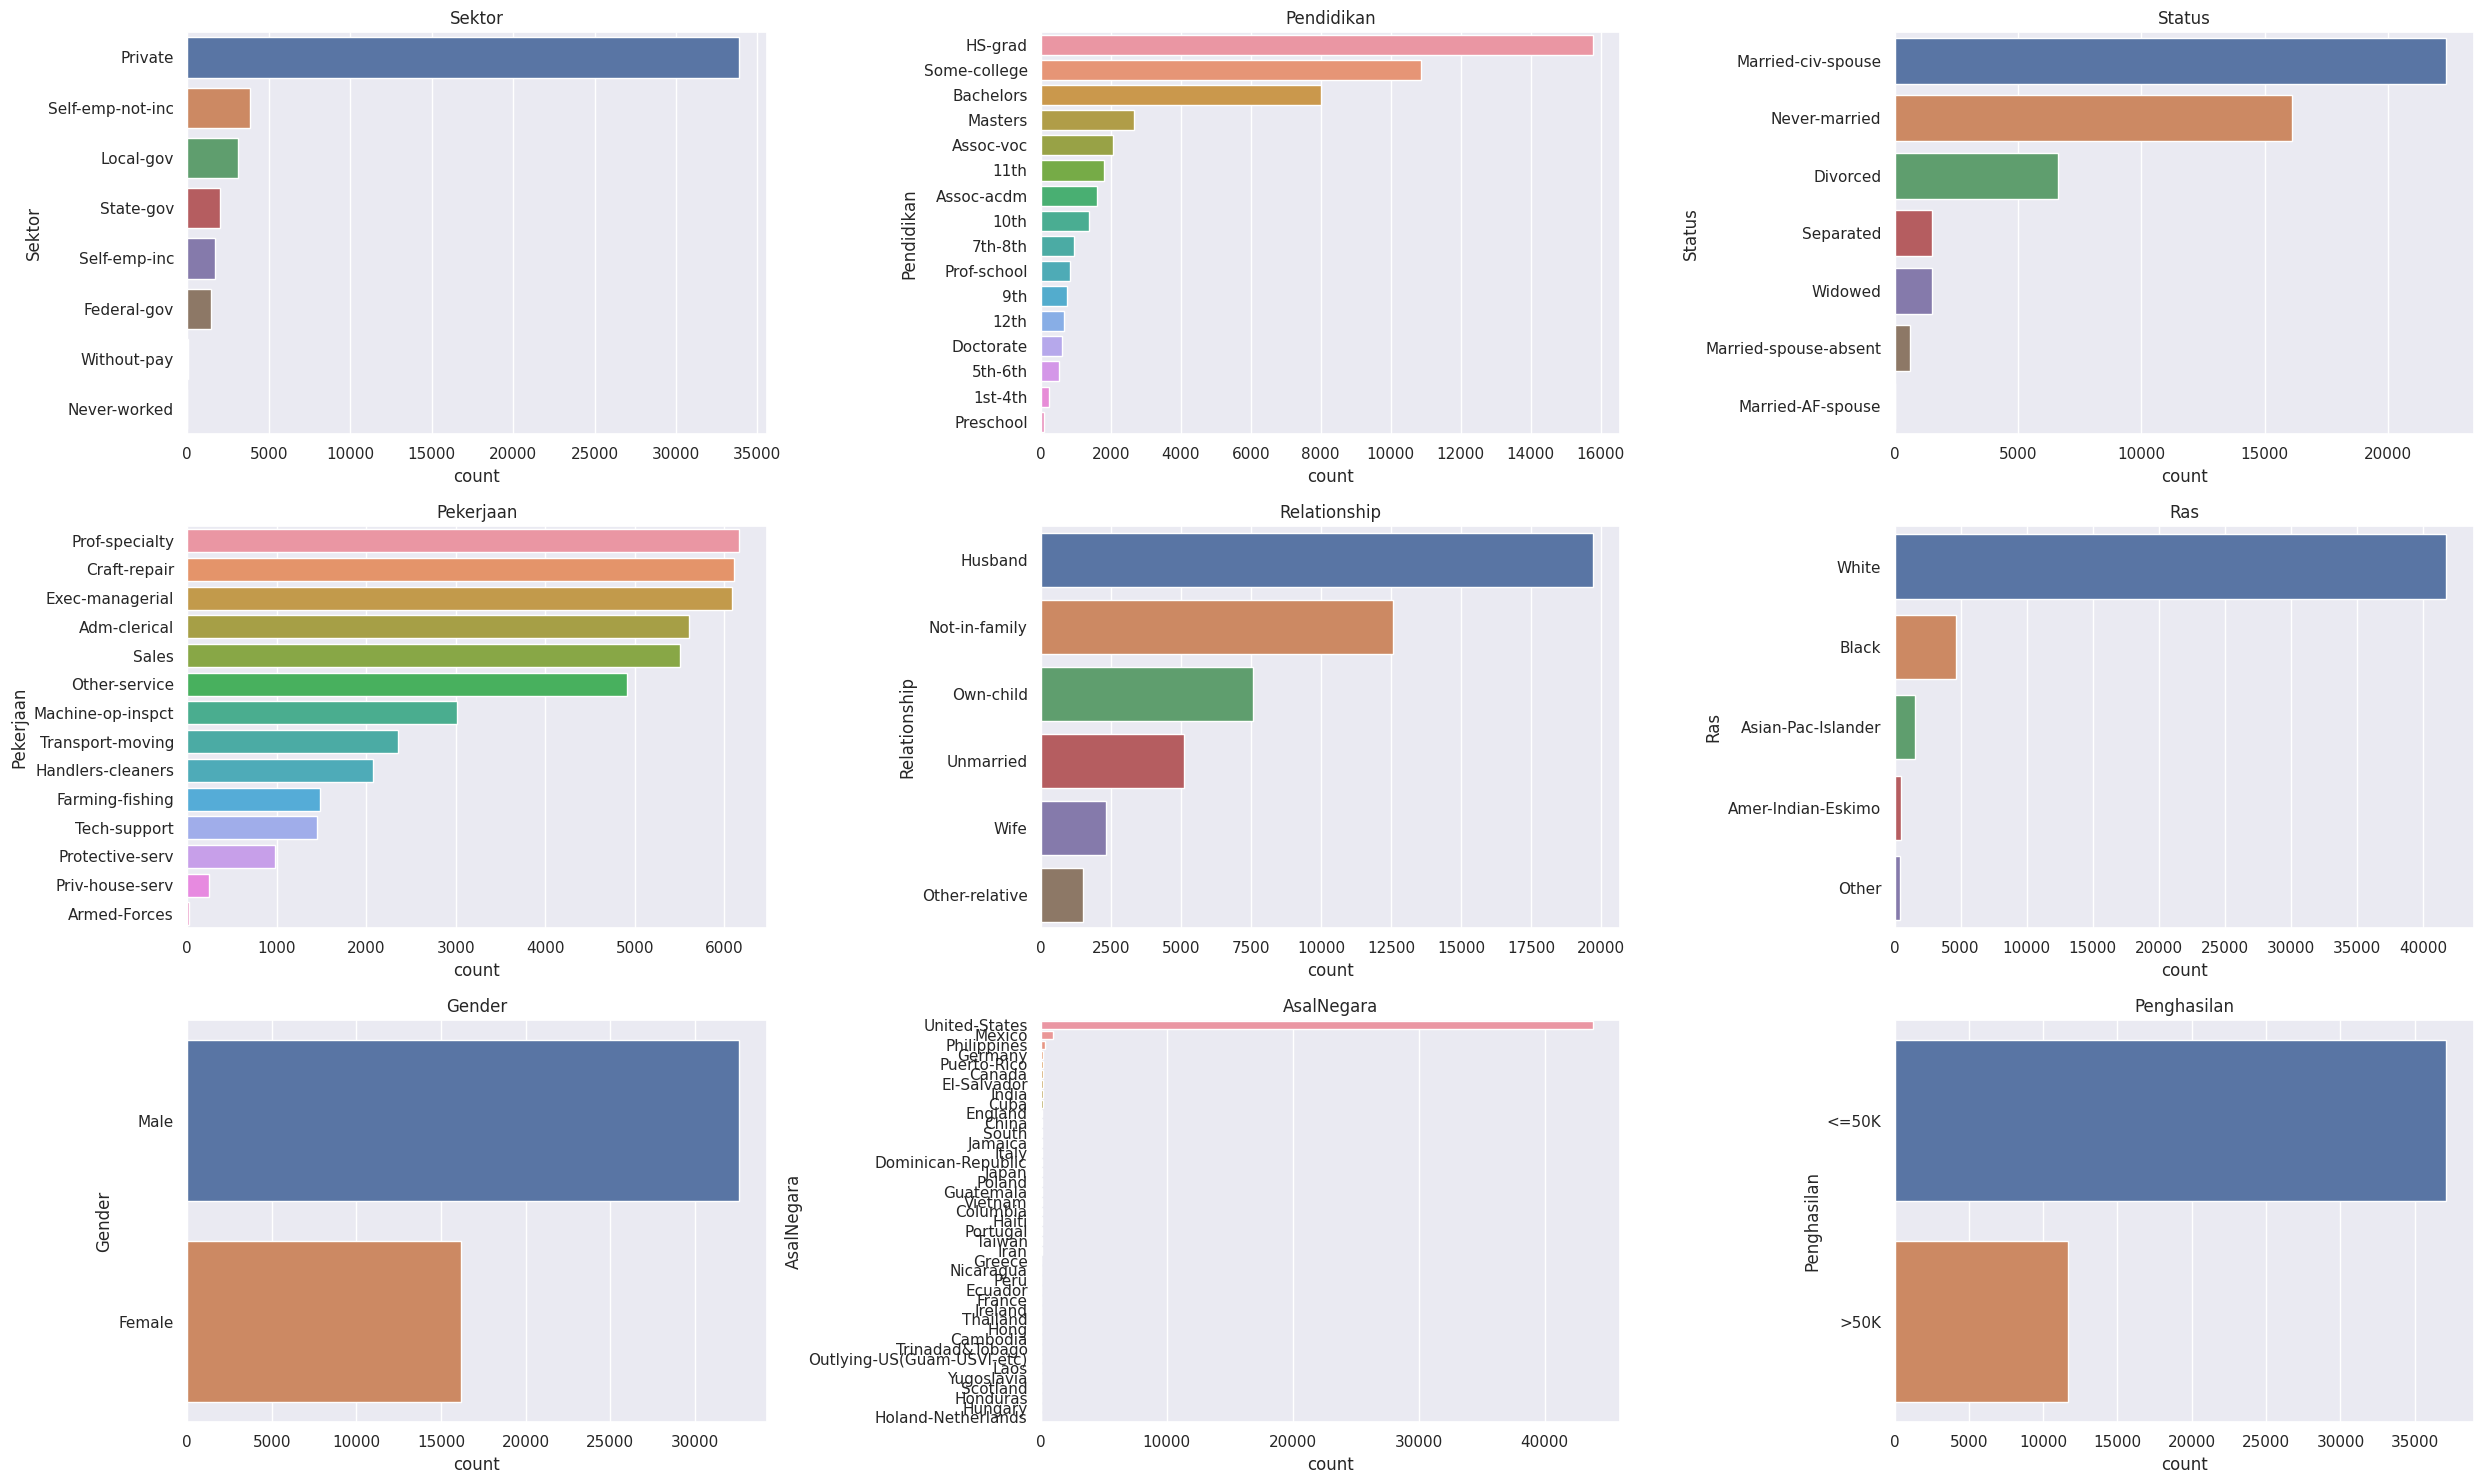

In [ ]:
# Menghitung jumlah baris dan kolom subplot
num_variables = len(catVar.columns)
num_cols = 3  # Sesuaikan sesuai kebutuhan
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 5 * num_rows))

# Menggunakan Seaborn untuk membuat countplot dalam grid
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = catVar.columns[i]
        if catVar[col].dtype == 'bool':
            sns.countplot(y=col, data=catVar.astype({col: 'object'}), ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        else:
            sns.countplot(y=col, data=catVar, ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

In [ ]:
# combine value variabel pendidikan
df['Pendidikan'] = df['Pendidikan'].replace(to_replace=["1st-4th", "5th-6th"], value="Elementary School")
df['Pendidikan'] = df['Pendidikan'].replace(to_replace=["7th-8th", "9th"], value="Junior High School")
df['Pendidikan'] = df['Pendidikan'].replace(to_replace=["10th", "11th", "12th"], value="Senior High School")

df['Sektor'] = df['Sektor'].replace(to_replace=['Without-pay', 'Never-worked'], value="Not Pay")
df['Sektor'] = df['Sektor'].replace(to_replace=['Local-gov', 'State-gov', 'Federal-gov'], value="Government")

In [ ]:
for col in df.select_dtypes(include = ['category']).columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Self-emp-not-inc', 'Not Pay', 'Self-emp-inc', 'Government', 'Private', nan}
Pendidikan :  {'Masters', 'Bachelors', 'Junior High School', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Preschool', 'Senior High School', 'Elementary School', 'Prof-school', 'Doctorate', 'Assoc-voc'}
Status :  {'Married-AF-spouse', 'Widowed', 'Separated', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married'}
Pekerjaan :  {'Other-service', 'Protective-serv', 'Farming-fishing', 'Transport-moving', 'Machine-op-inspct', 'Priv-house-serv', 'Exec-managerial', 'Prof-specialty', 'Adm-clerical', 'Tech-support', 'Craft-repair', nan, 'Armed-Forces', 'Sales', 'Handlers-cleaners'}
Relationship :  {'Not-in-family', 'Own-child', 'Husband', 'Unmarried', 'Other-relative', 'Wife'}
Ras :  {'Amer-Indian-Eskimo', 'Other', 'White', 'Black', 'Asian-Pac-Islander'}
Gender :  {'Male', 'Female'}
AsalNegara :  {'Ecuador', 'Vietnam', 'Japan', 'Taiwan', 'Haiti', 'Ireland', 'Mexico', nan, 'Portugal', 'Philipp

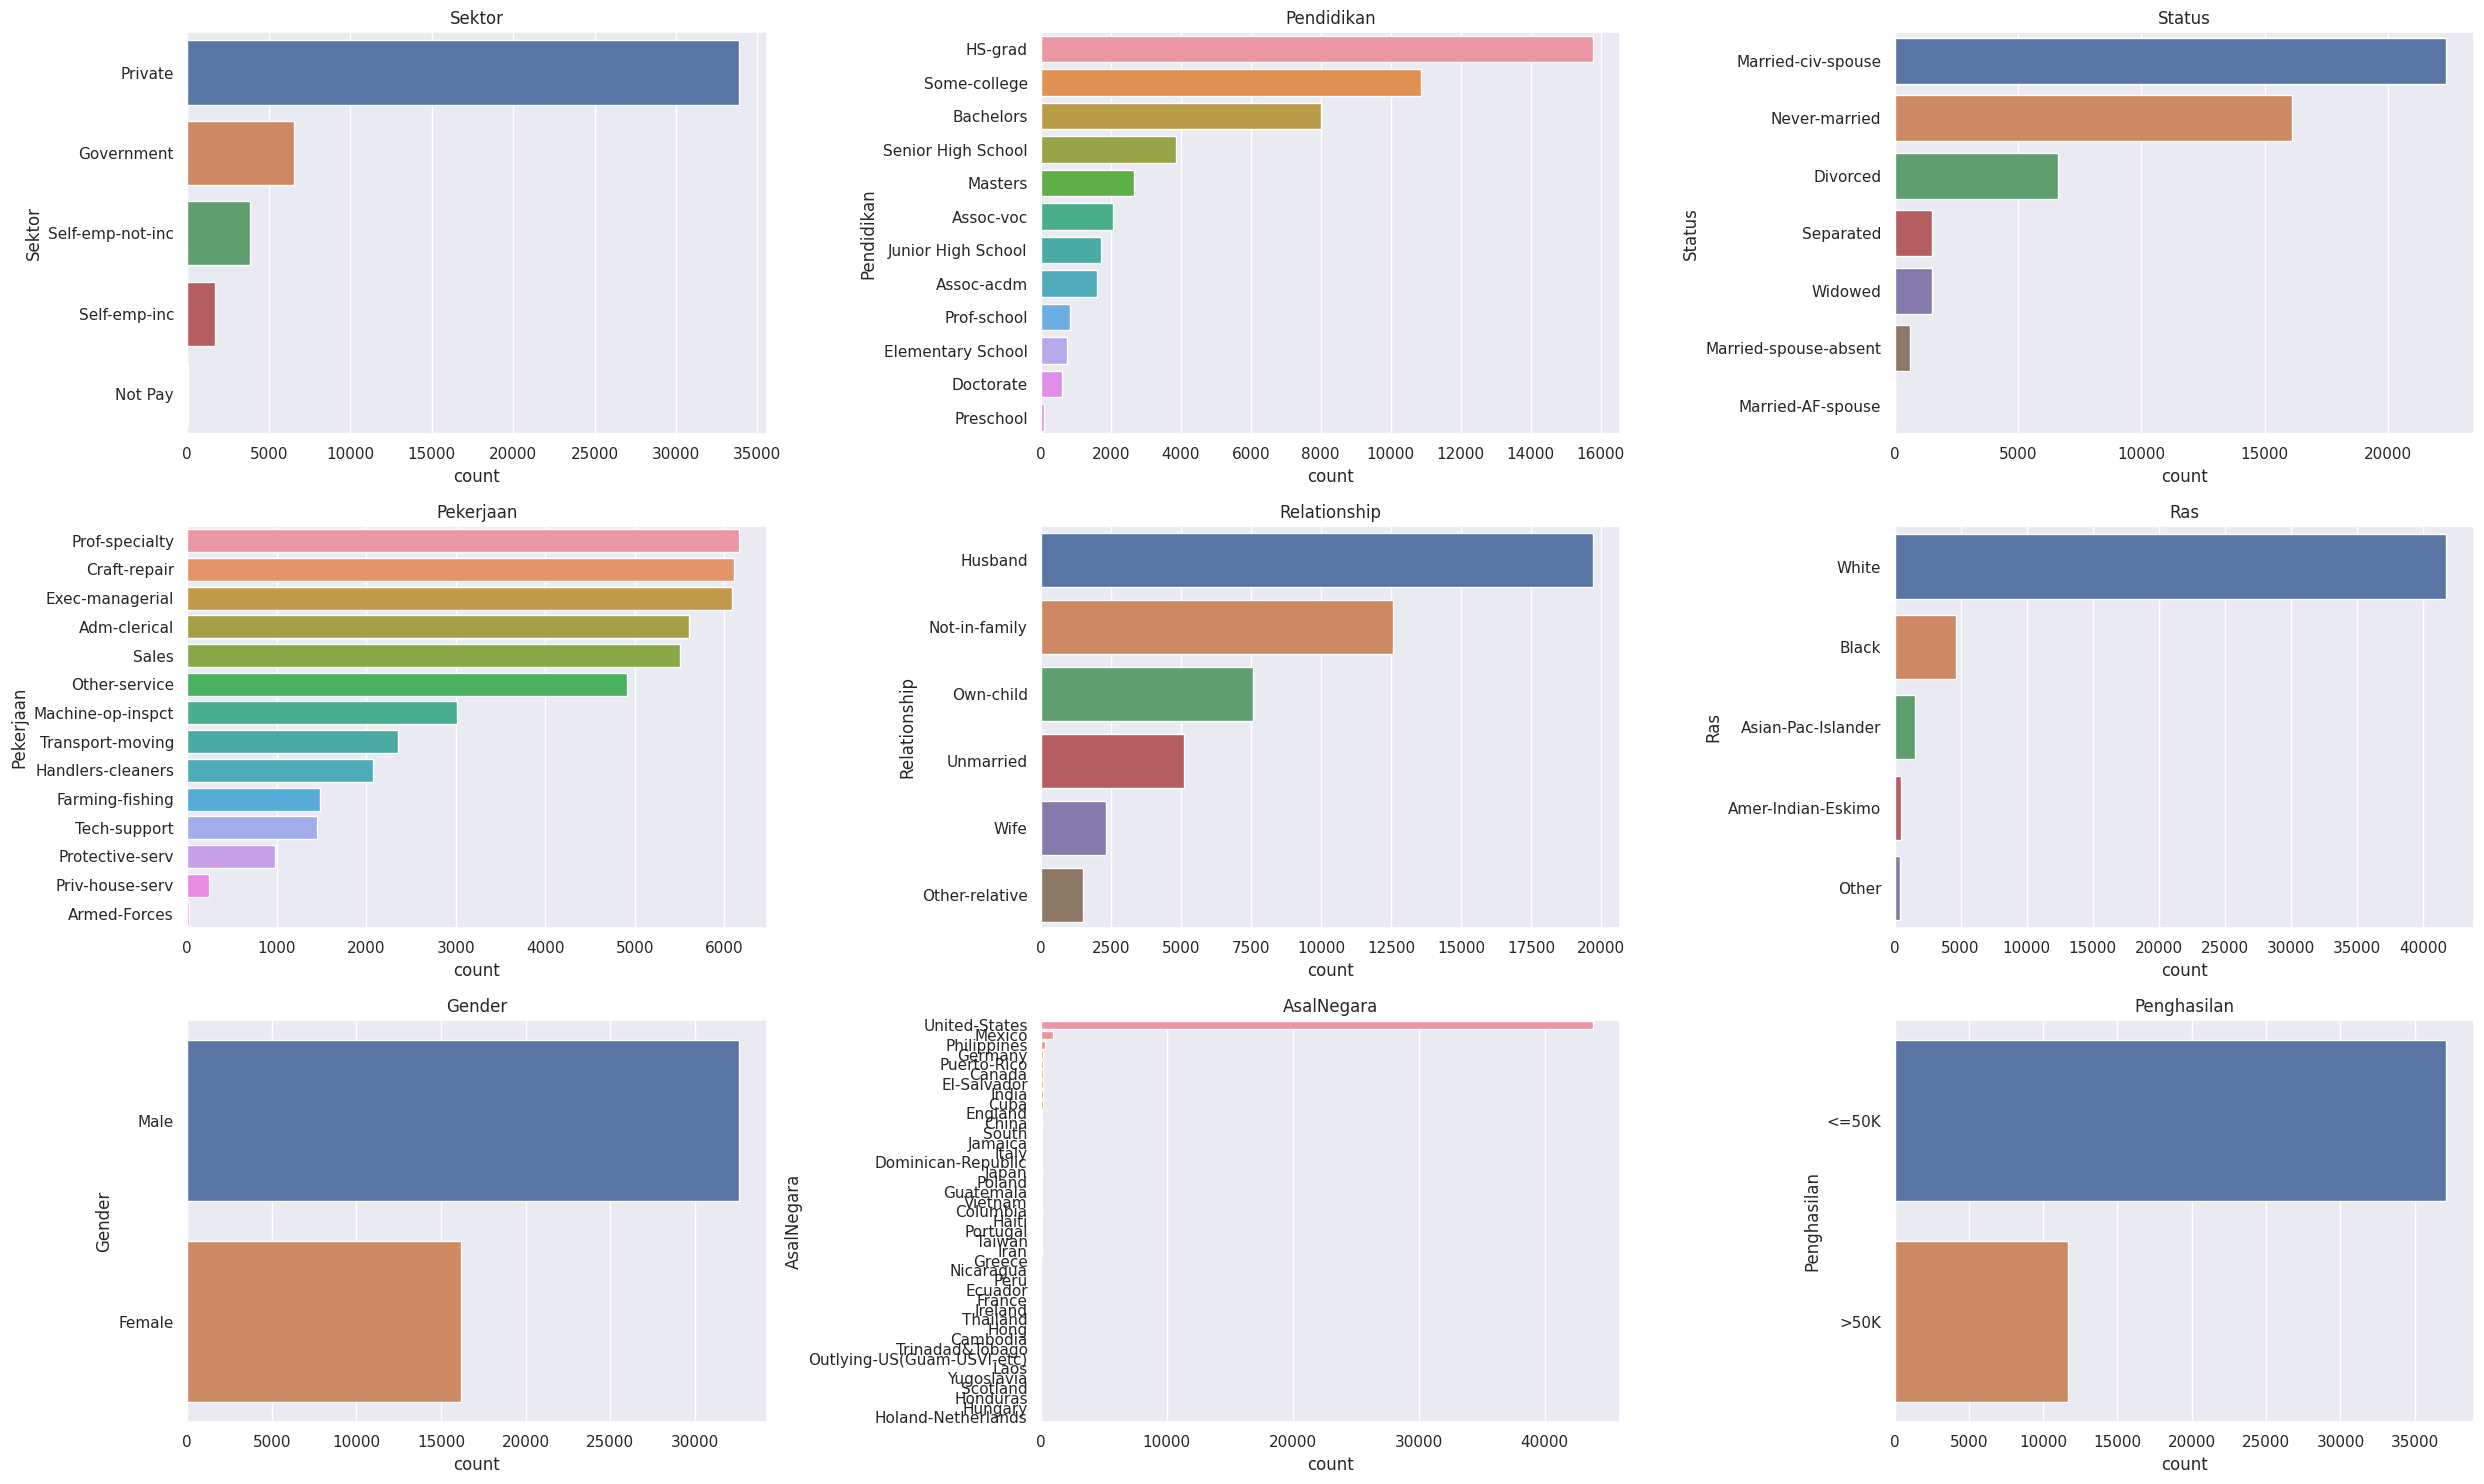

In [ ]:
catVar = df.select_dtypes(include = ['object', 'category'])
# Menghitung jumlah baris dan kolom subplot
num_variables = len(catVar.columns)
num_cols = 3  # Sesuaikan sesuai kebutuhan
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 5 * num_rows))

# Menggunakan Seaborn untuk membuat countplot dalam grid
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = catVar.columns[i]
        if catVar[col].dtype == 'bool':
            sns.countplot(y=col, data=catVar.astype({col: 'object'}), ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        else:
            sns.countplot(y=col, data=catVar, ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

### cek noise data numerik

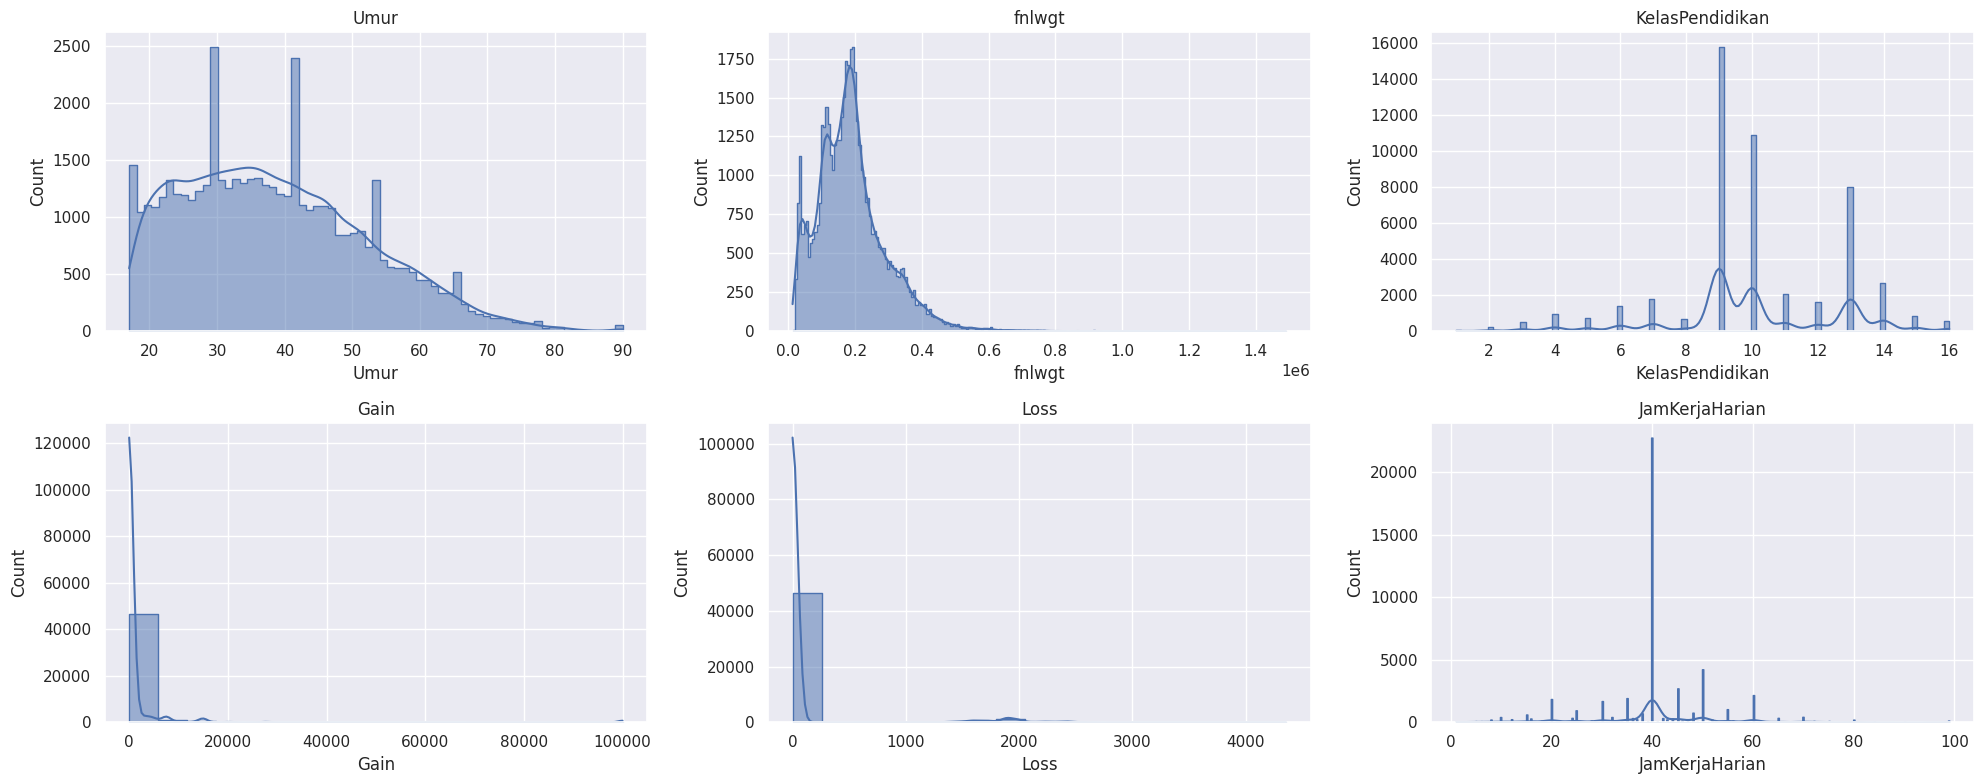

In [ ]:
# Membuat grid histogram dengan Seaborn
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Menggunakan Seaborn untuk membuat histogram dalam grid
for i in range(len(numVar.columns)):
    row, col = divmod(i, 3)
    sns.histplot(numVar.iloc[:, i], kde=True, ax=axes[row, col], element="step", stat="count", common_norm=False)
    axes[row, col].set_title(numVar.columns[i])

# Mengatur layout
plt.tight_layout()
plt.show()

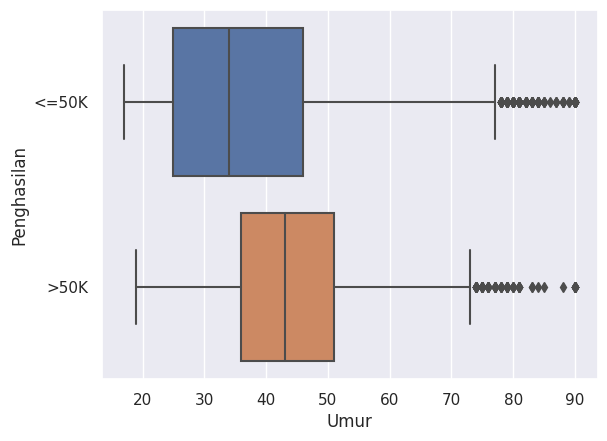

In [ ]:
# Visual Python: Visualization > Seaborn
p = sns.boxplot(x="Umur", y="Penghasilan", data=df)
plt.show()

Q1=28.0, Q3=48.0, IQR=20.0


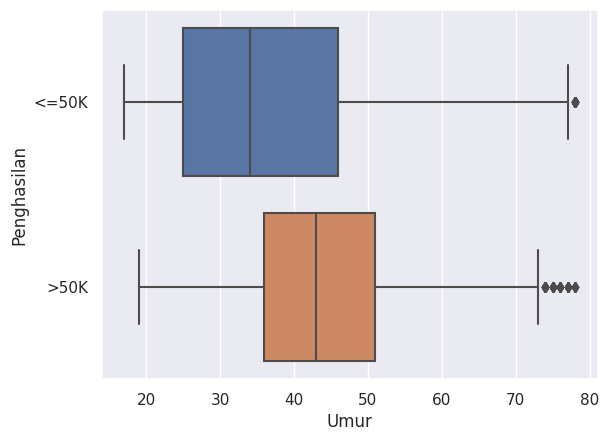

((48598, 15), (48813, 15))

In [ ]:
Q1 = df['Umur'].quantile(0.25)
Q3 = df['Umur'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Umur < Q1-1.5*IQR) | (df.Umur > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Umur", y="Penghasilan", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

**Menangani Missing Value**

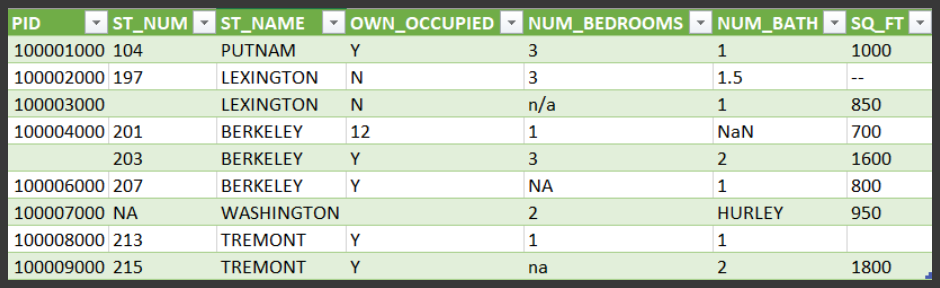

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 05: Missing Values</font></strong></h1></center>
    
Salah satu proses dalam data preprocessing adalah mengidentifikasi dan menangani *missing value*, apa itu *missing value*? *Missing value* adalah istilah untuk data yang hilang

## <font color="green">Penyebab Missing Value</font>
*   Error pada *data entry*, baik itu *human error*, kesalahan pada sistem, atau hardware/software fault.
*   Pada data survey/kuesioner, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif
* permasalahan yang dihadapi pada data di dunia nyata adalah, terkadang penandaan untuk mengatakan bahwa data tersebut *missing* sangat beragam, bisa ditulis ‘?’ (tanda tanya), bisa ditulis ‘-‘ (strip), bisa suatu bilangan yang sangat besar atau sangat kecil (misal 99 atau -999), di kosongkan, NaN, dsb.
### <font color="green">Langkah pertama penanganan MV adalah dengan melakukan EDA, terutama mengetahui berapa banyak proporsi data yang Missing.</font>

Perhatikan bahwa data ini memiliki berbagai macam cara untuk mengatakan bahwa data pada *cell* tertentu adalah *missing*, misalnya:

*   *cell*nya dikosongkan
*   ditulis dengan n/a, NA, na, ataupun NaN
*   ditulis dengan symbol –
*   ataupun mempunyai nilai yang cukup aneh seperti nilai 12 pada kolom OWN_OCCUPIED, ataupun HURLEY pada kolom NUM_BATH

Ketika kita meng-load data ini ke python menggunakan pandas, beberapa notasi *missing* yang umum [otomatis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dikategorikan sebagai NaN (notasi *missing value* pada python)

* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

Menangani Missing Values : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

*Metode Deletion*

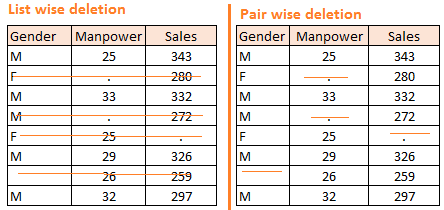

Mengabaikan Missing Value

* Beberapa algoritma machine learning atau metode analisis lainnya memiliki kemampuan internal model/algoritma untuk  menangani missing value, contohnya adalah decision tree, k-Nearest Neighbors (k-NN), Neural network yang dapat mengimputasi sendiri missing value pada data.

* Ataupun jika ada beberapa kolom yang tidak memberikan informasi apa apa, kita dapat membiarkan missing value ada di kolom tersebut karena kolom tersebut pun tidak memberikan informasi yang signifikan, contohnya adalah nomor tiket pada data penumpang kereta api, kita tidak perlu sulit-sulit memikirkan bagaimana cara mengimputasi kolom tersebut. Cukup drop kolom tersebut.


### <center><font color="blue"> Tipe Missing Value</font></center>
<font color="green">Langkah kedua penanganan MV adalah meneliti bagaimana MV terdistribusi (tipe MV).</font>
<img alt="" src="images/Missing value analysis mva.jpeg" style="height: 200px;" />

* **MCAR(Missing Completely at Random)**: Data hilang secara acak, dan tidak berkaitan dengan variabel/mekanisme apapun.
    - **Contoh**: Beberapa peserta workshop tidak hadir karena alasan masing-masing dan mereka tidak saling berkomunikasi.

* **MAR(Missing at Random)**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing
    - **Contoh**: Karena akhir tahun & banyak deadline, sehingga banyak karyawan yang memilih mengerjakan laporan ketimbang ikut workshop.

* **MNAR(Missing not at Random)**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing, dan juga dengan (harapan nilai) missing value itu sendiri.
    - **Contoh**: Siswa yang memiliki orang tua dengan penghasilan dibawah rata-rata akan lebih sungkan mengisi form yang menanyakan penghasilan orang tua. Apalagi kalau jawabannya harus berupa angka eksak (bukan pilihan berupa interval). Pada siatuasi ini tidak hanya data berpotensi missing, tapi juga berpotensi untuk menurunkan kualitas data (siswa berbohong).

In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())

Umur                  0
Sektor             2799
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2809
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


In [ ]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Umur,0.000000
Sektor,5.734128
fnlwgt,0.000000
Pendidikan,0.000000
KelasPendidikan,0.000000
Status,0.000000
Pekerjaan,5.754615
Relationship,0.000000
Ras,0.000000
Gender,0.000000


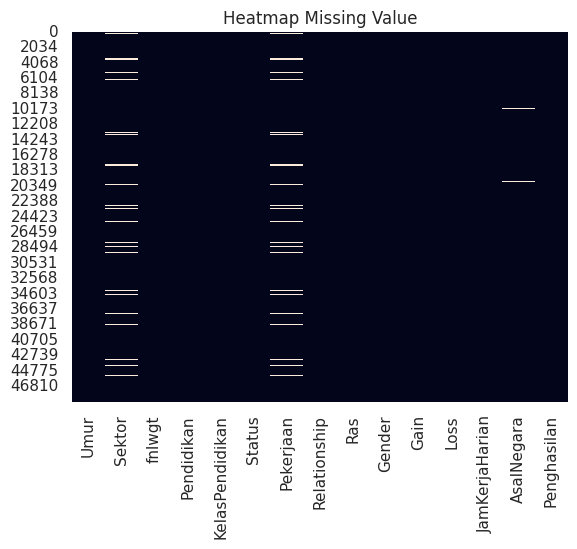

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
X = df.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#df.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(df.shape, X.shape)
X.head()

(48813, 15) (45194, 15)


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,Government,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Senior High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### transformasi

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 06: Transformasi</font></strong></h1></center>
<center><h3><font color="red">Biasanya dilakukan karena Hal-Hal berikut:</font></h3></center>

* Variabel numerik & Model Menggunakan Konsep Jarak: Skala variabel berbeda jauh. Misal X1=Gaji dalam jutaan dan X2=Jumlah Anak
* Model yang digunakan Linear (Regresi), tapi ada variabel yang hubungannya dengan variabel target tidak linear. Mengacu pada Regresi Non Linear.
* Variabelnya Kategorik, tapi model hanya menerima input numerik ==> Maka perlu dibentuk Variabel Dummy atau (One-Hot) Encoding.

## Contoh Model Pohon Keputusan yang tidak bisa numerik di Scikit Learn:

- https://scikit-learn.org/stable/modules/tree.html
- https://github.com/scikit-learn/scikit-learn/issues/5442


In [ ]:
print(df.shape)
for col in catVar.columns:
    if col != 'Penghasilan':
        transformasi = pd.get_dummies(df[col], prefix='')
        df = pd.concat([df, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            df.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(df.shape)
df.head()

(48813, 15)
(48813, 99)


,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Government,_Private,_Self-emp-inc,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Pemodelan

### Regresi Logistik

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  48813 , Kolom (jumlah variabel) =  99


,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Government,_Private,_Self-emp-inc,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictor = df.loc[:, ~df.columns.isin(['Penghasilan', 'fnlwgt', 'Gain', 'Loss'])]
target = df['Penghasilan']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.75, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(12203, 95) (12203,)
(36610, 95) (36610,)


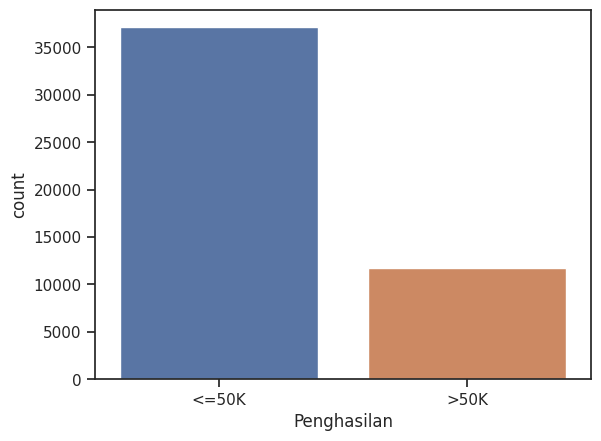

Counter({'<=50K': 37128, '>50K': 11685})
<50k =  76.06170487370167 % 50k =  23.93829512629832 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='Penghasilan')
plt.show()

D = Counter(df['Penghasilan'])
print(D)
print("<50k = ", D['<=50K']*100/(len(df['Penghasilan'])), '% 50k = ',D['>50K']*100/(len(df['Penghasilan'])) ,'%')
#Akurasi

akurasi minimal 76%

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[25676  2147]
 [ 3952  4835]]
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     27823
        >50K       0.69      0.55      0.61      8787

    accuracy                           0.83     36610
   macro avg       0.78      0.74      0.75     36610
weighted avg       0.82      0.83      0.83     36610



In [ ]:
#cross validasi
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.83 (+/- 0.01), Waktu = 28.642 detik


RegLog    0.824048
dtype: float64

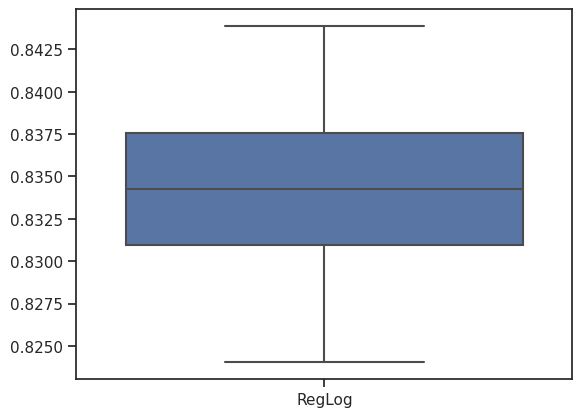

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

### Desicion Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[23786  4037]
 [ 4069  4718]]
              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85     27823
        >50K       0.54      0.54      0.54      8787

    accuracy                           0.78     36610
   macro avg       0.70      0.70      0.70     36610
weighted avg       0.78      0.78      0.78     36610



In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.79 (+/- 0.01), Waktu = 5.548 detik


In [ ]:
# Variabel importances
fitur_penting = pd.DataFrame({'Feature_Name' : DT.feature_names_in_, 'Feature_Importance' : DT.feature_importances_})
fitur_penting.sort_values(by = 'Feature_Importance', ascending = False).head(10)

,Feature_Name,Feature_Importance
22,_Married-civ-spouse,0.211785
0,Umur,0.201948
1,KelasPendidikan,0.137390
2,JamKerjaHarian,0.128722
4,_Private,0.021814
30,_Exec-managerial,0.018718
6,_Self-emp-not-inc,0.016847
29,_Craft-repair,0.014600
3,_Government,0.013947
38,_Sales,0.013440


In [ ]:
predictor1 = df.loc[:, ~df.columns.isin(['Penghasilan', 'fnlwgt', 'Gain', 'Loss'])]
predictor1 = predictor1[['_Married-civ-spouse', 'Umur', 'KelasPendidikan', 'JamKerjaHarian', '_Private', '_Exec-managerial', '_Government', '_Self-emp-not-inc', '_Craft-repair', '_White']]
target1 = df['Penghasilan']

xTrainfp, xTestfp, yTrainfp, yTestfp = train_test_split(predictor, target, test_size=0.75, random_state=33)
print(xTrainfp.shape, yTrainfp.shape)
print(xTestfp.shape, yTestfp.shape)

(12203, 95) (12203,)
(36610, 95) (36610,)


In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT_fp = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT_fp = DT_fp.fit(xTrainfp, yTrainfp)
prediksi_DT_fp = DT_fp.predict(xTestfp)

print(confusion_matrix(yTest, prediksi_DT_fp))
print(classification_report(yTest, prediksi_DT_fp))

[[23813  4010]
 [ 4029  4758]]
              precision    recall  f1-score   support

       <=50K       0.86      0.86      0.86     27823
        >50K       0.54      0.54      0.54      8787

    accuracy                           0.78     36610
   macro avg       0.70      0.70      0.70     36610
weighted avg       0.78      0.78      0.78     36610



In [ ]:
mulai = time.time()
scores_dt_fp = cross_val_score(DT_fp, predictor1, target1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt_fp.mean(), scores_dt_fp.std() * 2, waktu))

Accuracy Decision Tree: 0.79 (+/- 0.01), Waktu = 1.621 detik


RegLog        0.824048
DecTree       0.781602
DecTree_FP    0.786358
dtype: float64

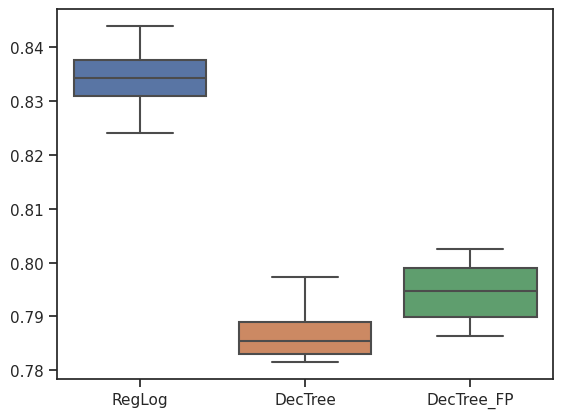

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt, "DecTree_FP":scores_dt_fp})
p = sns.boxplot(data = df_)
df_.min()

### optimasi parameter

In [ ]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8353672238601488
{'solver': 'lbfgs'}


In [ ]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8285664800418898
{'max_depth': 9, 'criterion': 'entropy'}


In [ ]:
# Optimal parameter Desion Tree FP
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
DTmodel_fp = tree.DecisionTreeClassifier()
dtree_gscv_fp = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv_fp.fit(xTrainfp, yTrainfp)

print(dtree_gscv_fp.best_score_)
print(dtree_gscv_fp.best_params_)

0.8290584175830077
{'max_depth': 9, 'criterion': 'entropy'}


Accuracy RL: 0.84 (+/- 0.01)
Accuracy DT: 0.83 (+/- 0.01)
Accuracy DT_fp: 0.83 (+/- 0.01)


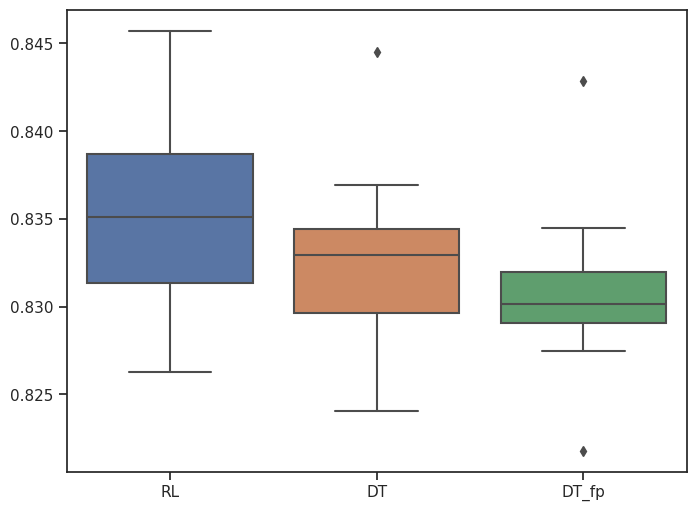

In [ ]:
kCV = 10 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
DT_fp_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT', 'DT_fp']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_fp_score = cross_val_score(DT_fp_opt, predictor1, target1, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score, DT_fp_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)